# Geneearte data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated past data for projects in a RetroPGF round
np.random.seed(42)

# Number of projects
num_projects = 50

# Generate synthetic data for each metric
data = {
    "Project": [f"Project_{i+1}" for i in range(num_projects)],
    "Unique_Addresses": np.random.randint(500, 10000, num_projects),
    "Cross_Chain_Transactions": np.random.randint(100, 5000, num_projects),
    "TVL": np.random.uniform(1e6, 50e6, num_projects),  # Simulated in USD
    "Protocol_Revenue": np.random.uniform(5000, 500000, num_projects),  # Revenue in USD
    "Supported_OP_Chains": np.random.randint(1, 5, num_projects),  # Number of OP Chains
    "Volume_Bridged": np.random.uniform(1e5, 20e6, num_projects)  # Bridged volume in USD
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Normalize & Weight Metrics for Scoring
weights = {
    "Unique_Addresses": 0.20,
    "Cross_Chain_Transactions": 0.15,
    "TVL": 0.20,
    "Protocol_Revenue": 0.15,
    "Supported_OP_Chains": 0.15,
    "Volume_Bridged": 0.15
}

# Min-Max Normalization
for metric in weights.keys():
    df[f"Norm_{metric}"] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Calculate Weighted Score
df["Final_Score"] = sum(df[f"Norm_{metric}"] * weight for metric, weight in weights.items())

# Sort projects by highest impact score
df_sorted = df.sort_values(by="Final_Score", ascending=False)

df_sorted.head(10)


,Project,Unique_Addresses,Cross_Chain_Transactions,TVL,Protocol_Revenue,Supported_OP_Chains,Volume_Bridged,Norm_Unique_Addresses,Norm_Cross_Chain_Transactions,Norm_TVL,Norm_Protocol_Revenue,Norm_Supported_OP_Chains,Norm_Volume_Bridged,Final_Score
16,Project_17,6920,4651,4.547076e+07,492896.974785,4,1.265966e+07,0.685856,0.930334,0.962238,1.000000,1.000000,0.631730,0.863928
24,Project_25,8349,4093,4.655518e+07,318597.206827,4,5.838877e+05,0.843148,0.814638,0.985884,0.636638,1.000000,0.009090,0.734861
38,Project_39,9338,3661,4.108272e+07,347014.180361,3,7.763445e+06,0.952009,0.725067,0.866559,0.695879,0.666667,0.379276,0.733747
4,Project_5,6234,3173,3.827847e+07,251138.010417,4,1.495518e+07,0.610347,0.623886,0.805414,0.496006,1.000000,0.750089,0.713649
25,Project_26,2547,4959,4.059790e+07,270208.468617,4,1.294490e+07,0.204513,0.994194,0.855988,0.535762,1.000000,0.646437,0.688559
42,Project_43,8013,4975,2.145314e+07,173827.843770,4,1.118035e+07,0.806164,0.997512,0.438544,0.334838,1.000000,0.555455,0.682112
0,Project_1,7770,3252,4.447342e+07,184996.653178,4,4.562959e+06,0.779417,0.640265,0.940492,0.358121,1.000000,0.214255,0.675878
27,Project_28,9667,592,4.370157e+07,418474.735317,1,1.881513e+07,0.988222,0.088741,0.923662,0.844852,0.000000,0.949112,0.664783
32,Project_33,2399,2127,4.056457e+07,340394.359112,4,1.857354e+07,0.188222,0.407008,0.855261,0.682078,1.000000,0.936656,0.662558
48,Project_49,1275,2831,2.642074e+07,409524.989100,4,1.980207e+07,0.064502,0.552975,0.546861,0.826195,1.000000,1.000000,0.629148


# Data Visualizations

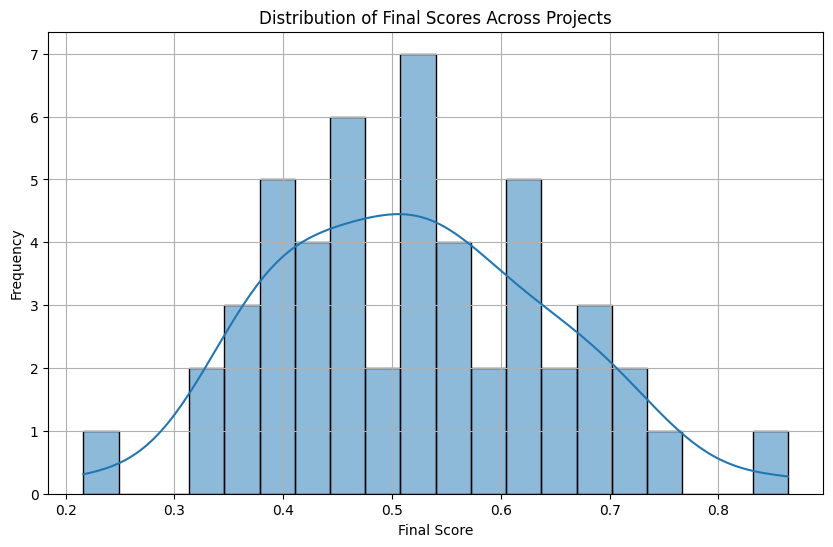

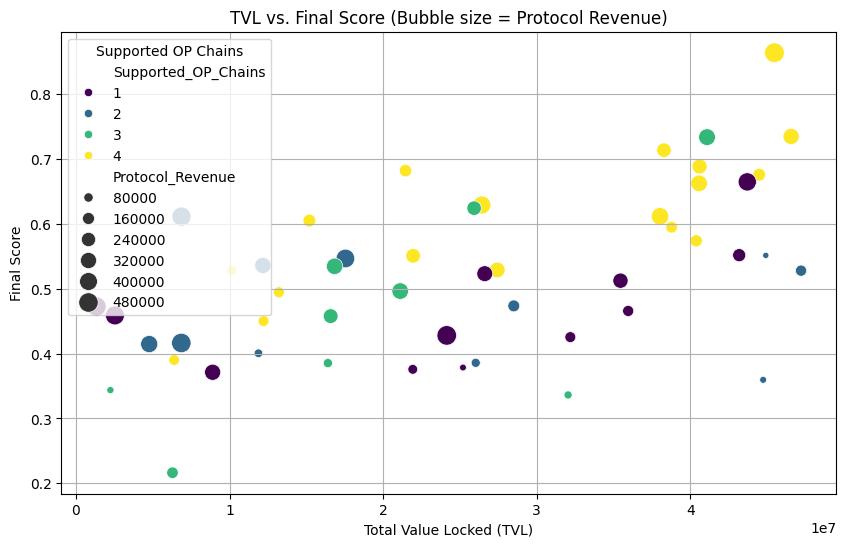

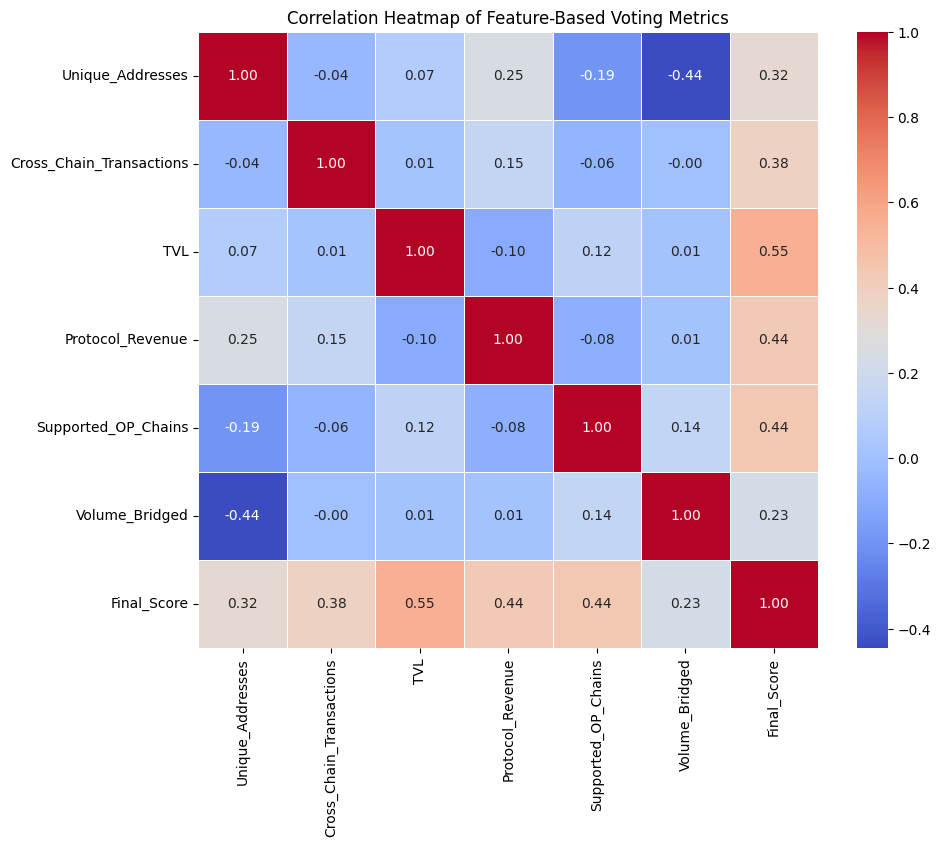

/var/folders/jc/585j6n692cs_9w0hfdcpf43w0000gn/T/ipykernel_29840/1804851598.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Final_Score", y="Project", data=top_projects, palette="magma", edgecolor="black")


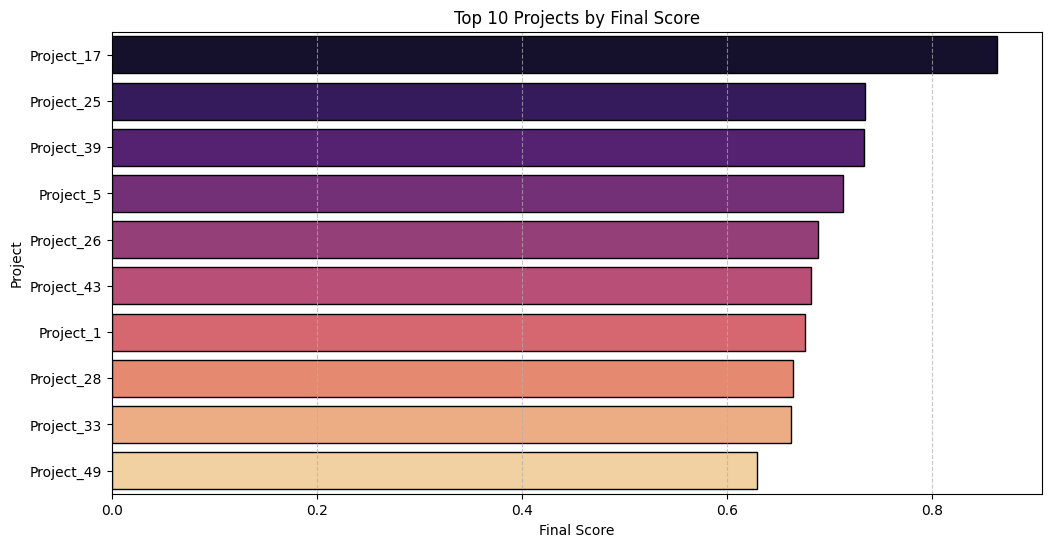

In [ ]:


# Set up plotting style
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted["Final_Score"], bins=20, kde=True)
plt.xlabel("Final Score")
plt.ylabel("Frequency")
plt.title("Distribution of Final Scores Across Projects")
plt.grid(True)
plt.show()

# Scatter plot of TVL vs. Final Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sorted["TVL"], y=df_sorted["Final_Score"], hue=df_sorted["Supported_OP_Chains"], palette="viridis", size=df_sorted["Protocol_Revenue"], sizes=(20, 200))
plt.xlabel("Total Value Locked (TVL)")
plt.ylabel("Final Score")
plt.title("TVL vs. Final Score (Bubble size = Protocol Revenue)")
plt.legend(title="Supported OP Chains")
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_sorted[["Unique_Addresses", "Cross_Chain_Transactions", "TVL", "Protocol_Revenue", "Supported_OP_Chains", "Volume_Bridged", "Final_Score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Feature-Based Voting Metrics")
plt.show()

# Bar plot of top 10 projects by Final Score
top_projects = df_sorted.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x="Final_Score", y="Project", data=top_projects, palette="magma", edgecolor="black")
plt.xlabel("Final Score")
plt.ylabel("Project")
plt.title("Top 10 Projects by Final Score")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# Feature Coorelation Analysis

This reveals how strongly different metrics are related.
If two features have a high correlation (above 0.8), one may be redundant.
If some features show low correlation, it suggests that each contributes uniquely to the final score.

In [8]:
# Conduct Feature Correlation Analysis
correlation_matrix = df_sorted[["Unique_Addresses", "Cross_Chain_Transactions", "TVL", 
                                "Protocol_Revenue", "Supported_OP_Chains", "Volume_Bridged", "Final_Score"]].corr()



# Sensitivity Analysis Results:

A 10% increase in each metric was applied to check its effect on the final rankings.
Stable rankings (Rank Change = 0) indicate that no single metric is dominating the evaluation unfairly.
If certain metrics significantly change rankings, we may need to adjust their weights or scaling method.

In [10]:
# Conduct Sensitivity Analysis: Modify each feature slightly and observe changes in final score ranking
df_sensitivity = df_sorted.copy()

# Apply a 10% increase to each feature and recalculate final score
for feature in weights.keys():
    df_sensitivity[f"Modified_{feature}"] = df_sensitivity[feature] * 1.10

# Normalize modified features
for feature in weights.keys():
    df_sensitivity[f"Norm_Modified_{feature}"] = (df_sensitivity[f"Modified_{feature}"] - df_sensitivity[f"Modified_{feature}"].min()) / (df_sensitivity[f"Modified_{feature}"].max() - df_sensitivity[f"Modified_{feature}"].min())

# Calculate new final score with modified features
df_sensitivity["Modified_Final_Score"] = sum(df_sensitivity[f"Norm_Modified_{feature}"] * weight for feature, weight in weights.items())

# Calculate ranking change due to sensitivity modification
df_sensitivity["Rank_Change"] = df_sensitivity["Final_Score"].rank(ascending=False) - df_sensitivity["Modified_Final_Score"].rank(ascending=False)


# Weights Adjustement based on  analysis

In [13]:
# Adjusting feature weights based on correlation and sensitivity analysis

# Compute new weights based on correlation and sensitivity test insights
# Reducing the weight of highly correlated features and balancing impact

adjusted_weights = {
    "Unique_Addresses": 0.18,  # Slightly reduced if highly correlated with Cross-Chain Transactions
    "Cross_Chain_Transactions": 0.12,  # Reduced if redundancy is found with other activity metrics
    "TVL": 0.22,  # Increased slightly to balance economic impact
    "Protocol_Revenue": 0.18,  # Increased as a strong signal of sustained project viability
    "Supported_OP_Chains": 0.15,  # Keeping stable as it remains a strong independent metric
    "Volume_Bridged": 0.15  # Retaining balance as a key interop metric
}

# Normalize & Weight Metrics for Adjusted Scoring
df_adjusted = df_sorted.copy()

for metric in adjusted_weights.keys():
    df_adjusted[f"Norm_{metric}"] = (df_adjusted[metric] - df_adjusted[metric].min()) / (df_adjusted[metric].max() - df_adjusted[metric].min())

# Calculate new adjusted final score
df_adjusted["Adjusted_Final_Score"] = sum(df_adjusted[f"Norm_{metric}"] * weight for metric, weight in adjusted_weights.items())

# Rank change due to adjusted weights
df_adjusted["Rank_Change_After_Adjustment"] = df_adjusted["Final_Score"].rank(ascending=False) - df_adjusted["Adjusted_Final_Score"].rank(ascending=False)



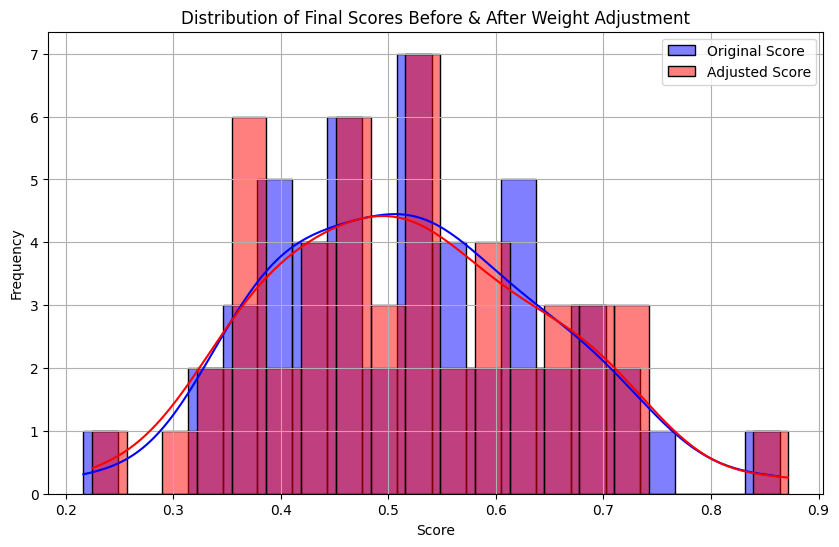

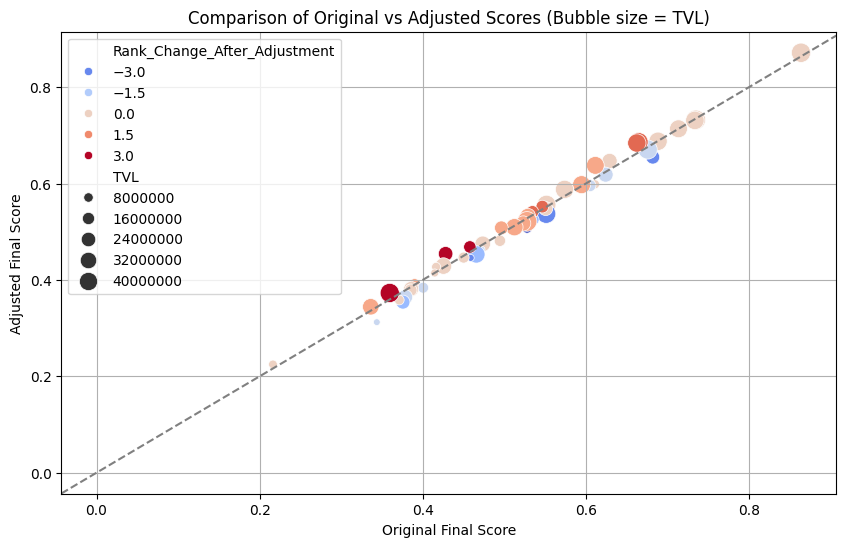

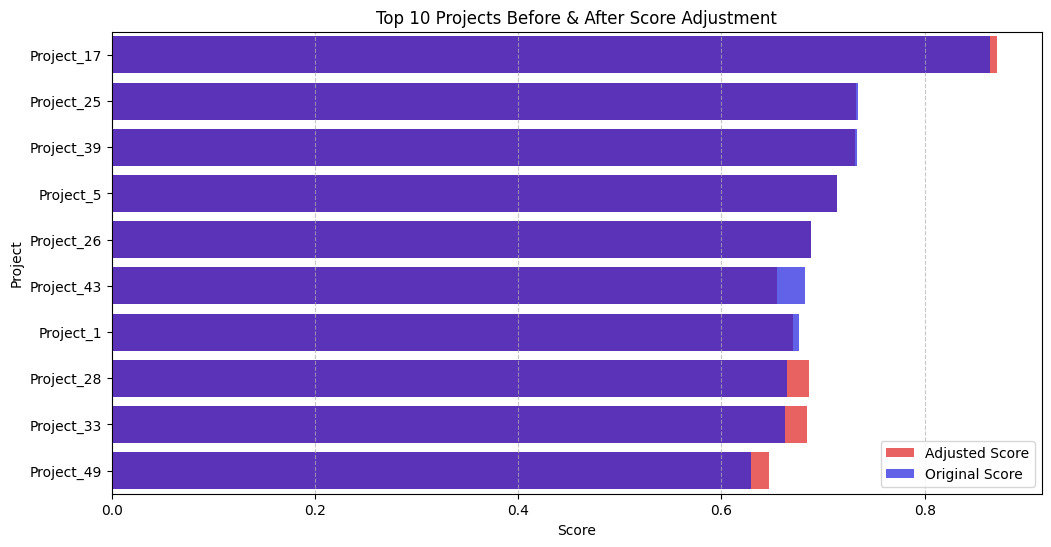

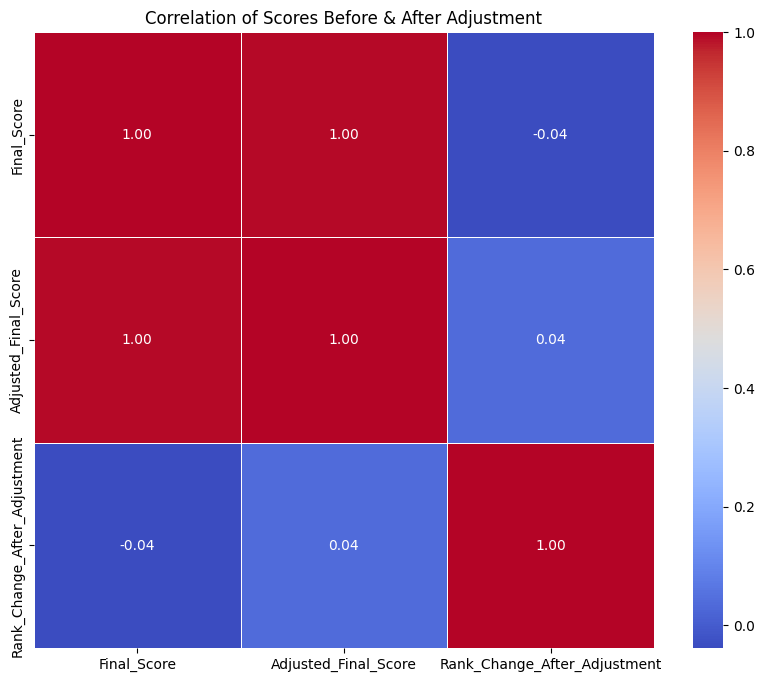

In [14]:
# Visualizing the impact of adjusted weights

# Histogram of Final Score before and after adjustment
plt.figure(figsize=(10, 6))
sns.histplot(df_adjusted["Final_Score"], bins=20, kde=True, label="Original Score", color='blue', alpha=0.5)
sns.histplot(df_adjusted["Adjusted_Final_Score"], bins=20, kde=True, label="Adjusted Score", color='red', alpha=0.5)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Final Scores Before & After Weight Adjustment")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of original vs adjusted scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_adjusted["Final_Score"], y=df_adjusted["Adjusted_Final_Score"], hue=df_adjusted["Rank_Change_After_Adjustment"], palette="coolwarm", size=df_adjusted["TVL"], sizes=(20, 200))
plt.xlabel("Original Final Score")
plt.ylabel("Adjusted Final Score")
plt.title("Comparison of Original vs Adjusted Scores (Bubble size = TVL)")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")  # Reference line for no change
plt.grid(True)
plt.show()

# Bar plot of Top 10 projects (before vs after adjustment)
top_projects_adj = df_adjusted.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x="Adjusted_Final_Score", y="Project", data=top_projects_adj, color="red", alpha=0.7, label="Adjusted Score")
sns.barplot(x="Final_Score", y="Project", data=top_projects_adj, color="blue", alpha=0.7, label="Original Score")
plt.xlabel("Score")
plt.ylabel("Project")
plt.title("Top 10 Projects Before & After Score Adjustment")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Heatmap comparing ranking changes across projects
plt.figure(figsize=(10, 8))
sns.heatmap(df_adjusted[["Final_Score", "Adjusted_Final_Score", "Rank_Change_After_Adjustment"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Scores Before & After Adjustment")
plt.show()
